In [2]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/aseo/Downloads/202109-citibike-tripdata.csv')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,22C33F42C6A0E28E,classic_bike,2021-09-01 10:26:45,2021-09-01 10:43:23,Central Park West & W 72 St,7141.07,E 51 St & 1 Ave,6532.06,40.775794,-73.976206,40.754557,-73.965930,member
1,035F743147FCFCDE,classic_bike,2021-09-04 09:52:40,2021-09-04 10:09:19,William St & Pine St,5065.12,NaN,NaN,40.707179,-74.008873,40.720000,-74.010000,member
2,9C43CF6A07DACBC6,classic_bike,2021-09-06 17:07:40,2021-09-06 17:34:44,Fulton St & Broadway,5175.08,Jay St & Tech Pl,4710.06,40.711066,-74.009447,40.695065,-73.987167,casual
3,253A1A5B20CC78EE,classic_bike,2021-09-28 16:53:43,2021-09-28 17:03:00,West Drive & Prospect Park West,3651.04,Ocean Pkwy & Church Ave,3125.09,40.661063,-73.979453,40.644719,-73.974515,member
4,5E8F164D6798CEFA,classic_bike,2021-09-19 09:37:47,2021-09-19 09:53:42,Lorimer St & Broadway,4965.01,Jay St & Tech Pl,4710.06,40.704118,-73.948186,40.695065,-73.987167,member


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280221 entries, 0 to 3280220
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(5), object(8)
memory usage: 325.3+ MB


In [6]:
df.isnull().sum()
#finding null values

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       18
start_station_id         18
end_station_name      15351
end_station_id        15351
start_lat                 0
start_lng                 0
end_lat                8784
end_lng                8784
member_casual             0
dtype: int64

In [7]:
df.dropna(inplace=True)
#remove rows with empty cells 

In [8]:
df['Start Date'] = pd.to_datetime(df['started_at']).dt.date
df['Start Time'] = pd.to_datetime(df['started_at']).dt.time
df['End Date'] = pd.to_datetime(df['ended_at']).dt.date
df['End Time'] = pd.to_datetime(df['ended_at']).dt.time

In [9]:
df.rename(columns={'started_at': 'Start Full', 'ended_at': 'End Full','start_station_name': 'Start Station', 'end_station_name': 'End Station', 'start_station_id': 'Start ID', 'end_station_id': 'End ID'}, inplace=True)

In [10]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [11]:
geolocator = Nominatim(user_agent="bikeshare")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1, max_retries=0)

In [12]:
dfstart=df[['Start ID','Start Station',\
'start_lat','start_lng']]\
.drop_duplicates(subset = ['Start ID'])

In [13]:
dfstart.columns=['Station_ID','Station_Name','Latitude','Longitude']
dfstart.set_index('Station_ID', inplace=True)
dfstart

,Station_Name,Latitude,Longitude
Station_ID,,,
7141.07,Central Park West & W 72 St,40.775794,-73.976206
5175.08,Fulton St & Broadway,40.711066,-74.009447
3651.04,West Drive & Prospect Park West,40.661063,-73.979453
4965.01,Lorimer St & Broadway,40.704118,-73.948186
5065.12,William St & Pine St,40.707179,-74.008873
...,...,...,...
7340.07,West End Ave & W 78 St,40.783786,-73.981687
7230.10,W 74 St & Columbus Ave,40.778567,-73.977550
8290.01,Nelson Ave & W 172 St,40.843965,-73.920999


In [14]:
locations=[]
for index, row in dfstart.iterrows():
    locations.append(reverse("{}, {}".format(row['Latitude'],\
    row['Longitude'])).raw['address'])

In [92]:
pd.DataFrame(locations[:50])

,building,house_number,road,quarter,neighbourhood,suburb,county,city,state,postcode,country,country_code,amenity,city_district,emergency,tourism,shop,railway
0,The Majestic,115,Central Park West,Upper West Side,Manhattan Community Board 7,Manhattan,New York County,New York,New York,10023,United States,us,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Fulton Street,NaN,Manhattan Community Board 1,Manhattan,New York County,New York,New York,10038,United States,us,Citi Bike - Fulton St & Broadway,NaN,NaN,NaN,NaN,NaN
2,NaN,196,Prospect Park West,NaN,Park Slope,NaN,NaN,New York,New York,11215,United States,us,NaN,Kings County,NaN,NaN,NaN,NaN
3,NaN,NaN,Throop Avenue,NaN,NaN,Brooklyn,NaN,New York,New York,11221,United States,us,Citi Bike - Lorimer St & Broadway,Kings County,NaN,NaN,NaN,NaN
4,NaN,NaN,Chase Manhattan Plaza,NaN,Manhattan Community Board 1,Manhattan,New York County,New York,New York,10045,United States,us,Citi Bike,NaN,NaN,NaN,NaN,NaN
5,NaN,347,Bond Street,NaN,NaN,Brooklyn,NaN,New York,New York,11231,United States,us,NaN,Kings County,FDNY EMS Station 32,NaN,NaN,NaN
6,NaN,NaN,Fulton Street,NaN,Fort Greene,NaN,NaN,New York,New York,11207,United States,us,Citi Bike - Fulton St & Clermont Ave,Kings County,NaN,NaN,NaN,NaN
7,NaN,NaN,Brooklyn Bridge,NaN,NaN,Brooklyn,NaN,New York,New York,11201-1832,United States,us,NaN,Kings County,NaN,Brooklyn Bridge,NaN,NaN
8,NaN,NaN,Willow Avenue,NaN,Bronx County,The Bronx,NaN,New York,New York,10454,United States,us,Bronx Tavern,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,West 116th Street,NaN,Manhattan Community Board 9,Manhattan,New York County,New York,New York,10027,United States,us,NaN,NaN,NaN,NaN,Halal Cart,NaN


In [15]:
dfstations = pd.DataFrame(index=dfstart.index, data=locations,\
      columns=['neighbourhood','suburb','postcode'])
dfstations.rename(columns={"neighbourhood":"Neighborhood",\
      "suburb": "Borough", "postcode": "Zip_Code"}\
      ,inplace=True)
#picking relevant columns

In [16]:
dfstations['Neighborhood'] = dfstations['Neighborhood'].astype('category')
dfstations['Borough'] = dfstations['Borough'].astype('category')
dfstations['Zip_Code'] = dfstations['Zip_Code'].str[:5].astype('category')
cols = ['Neighborhood', 'Borough']

In [17]:
dfstations.head()

,Neighborhood,Borough,Zip_Code
Station_ID,,,
7141.07,NaN,Manhattan,10023
5175.08,Manhattan Community Board 1,Manhattan,10038
3651.04,Park Slope,NaN,11215
4965.01,NaN,Brooklyn,11221
5065.12,Manhattan Community Board 1,Manhattan,10045


In [18]:
dfstations = dfstations.reset_index()
dfstations

,Station_ID,Neighborhood,Borough,Zip_Code
0,7141.07,NaN,Manhattan,10023
1,5175.08,Manhattan Community Board 1,Manhattan,10038
2,3651.04,Park Slope,NaN,11215
3,4965.01,NaN,Brooklyn,11221
4,5065.12,Manhattan Community Board 1,Manhattan,10045
...,...,...,...,...
1483,7340.07,Manhattan Community Board 7,Manhattan,10024
1484,7230.10,Manhattan Community Board 7,Manhattan,10023
1485,8290.01,Bronx County,The Bronx,10452
1486,4203.04,NaN,Brooklyn,11233


In [19]:
dfstations.rename(columns={"Station_ID": "Start ID"}, inplace = True)

In [20]:
df = pd.merge(df,dfstations, how = 'outer', on='Start ID')
#adding starting neighborhood, borough, zip code to original data

In [21]:
df.rename(columns={"Neighborhood": "Start Neighborhood", "Borough": "Start Borough", "Zip_Code": "Start Zip Code"}, inplace = True)
#renaming columns to avoid confusion

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264870 entries, 0 to 3264869
Data columns (total 20 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ride_id             object  
 1   rideable_type       object  
 2   Start Full          object  
 3   End Full            object  
 4   Start Station       object  
 5   Start ID            float64 
 6   End Station         object  
 7   End ID              object  
 8   start_lat           float64 
 9   start_lng           float64 
 10  end_lat             float64 
 11  end_lng             float64 
 12  member_casual       object  
 13  Start Date          object  
 14  Start Time          object  
 15  End Date            object  
 16  End Time            object  
 17  Start Neighborhood  category
 18  Start Borough       category
 19  Start Zip Code      category
dtypes: category(3), float64(5), object(12)
memory usage: 457.7+ MB


In [306]:
#Repeat process for End Addresses 

In [23]:
dfend=df[['End ID','End Station',\
'end_lat','end_lng']]\
.drop_duplicates(subset = ['End ID'])

In [24]:
dfend.columns=['Station_ID','Station_Name','Latitude','Longitude']
dfend.set_index('Station_ID', inplace=True)
dfend

,Station_Name,Latitude,Longitude
Station_ID,,,
6532.06,E 51 St & 1 Ave,40.754557,-73.965930
7511.19,5 Ave & E 103 St,40.792255,-73.952499
7745.07,W 120 St & Claremont Ave,40.810949,-73.963400
8226.07,W 168th S & Fort Washington Ave,40.842102,-73.942240
7049.04,E 82 St & East End Ave,40.772461,-73.946821
...,...,...,...
7751.05,Wales Ave & E 147 St,40.811314,-73.907729
JC057,Riverview Park,40.744319,-74.043991
8419.03,Anthony Ave & E Burnside Ave,40.851980,-73.902670


In [25]:
locations2=[]
for index, row in dfend.iterrows():
    locations2.append(reverse("{}, {}".format(row['Latitude'],\
    row['Longitude'])).raw['address'])

In [120]:
pd.DataFrame(locations2[:50])

,amenity,road,neighbourhood,suburb,county,city,state,postcode,country,country_code,house_number,building,quarter,highway,shop,railway,city_district
0,Citi Bike - E 51 St & 1 Ave,East 51st Street,Manhattan Community Board 6,Manhattan,New York County,New York,New York,10022,United States,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5th Avenue,Manhattan Community Board 11,Manhattan,New York County,New York,New York,10029,United States,us,1219,NaN,NaN,NaN,NaN,NaN,NaN
2,Citi Bike,West 120th Street,Manhattan Community Board 9,Manhattan,New York County,New York,New York,10027,United States,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,West 168th Street,Manhattan Community Board 12,Manhattan,New York County,New York,New York,10032,United States,us,650,William Black Building,Washington Heights,NaN,NaN,NaN,NaN
4,NaN,East 82nd Street,Manhattan Community Board 8,Manhattan,New York County,New York,New York,10028,United States,us,531,NaN,Upper East Side,NaN,NaN,NaN,NaN
5,NaN,Central Park Outer Loop,NaN,Manhattan,New York County,New York,New York,10025,United States,us,NaN,NaN,NaN,Central Park West & West 90th Street,NaN,NaN,NaN
6,NaN,West 155th Street,Manhattan Community Board 10,Manhattan,New York County,New York,New York,10039,United States,us,300,NaN,Harlem,NaN,NaN,NaN,NaN
7,NaN,West 84th Street,Manhattan Community Board 7,Manhattan,New York County,New York,New York,10024,United States,us,66,NaN,Upper West Side,NaN,NaN,NaN,NaN
8,Citi Bike - Broadway & W 58 St,Broadway,Manhattan Community Board 5,Manhattan,New York County,New York,New York,10019,United States,us,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
9,NaN,Central Park West,Manhattan Community Board 7,Manhattan,New York County,New York,New York,10025,United States,us,455,New York Cancer Hospital,Upper West Side,NaN,NaN,NaN,NaN


In [26]:
dfstations_end = pd.DataFrame(index=dfend.index, data=locations2,\
      columns=['neighbourhood','suburb','postcode'])
dfstations_end.rename(columns={"neighbourhood":"Neighborhood",\
      "suburb": "Borough", "postcode": "Zip_Code"}\
      ,inplace=True )

In [27]:
dfstations_end['Neighborhood'] = dfstations_end['Neighborhood'].astype('category')
dfstations_end['Borough'] = dfstations_end['Borough'].astype('category')
dfstations_end['Zip_Code'] = dfstations_end['Zip_Code'].str[:5].astype('category')
cols2 = ['Neighborhood', 'Borough']

In [28]:
dfstations_end.head()

,Neighborhood,Borough,Zip_Code
Station_ID,,,
6532.06,Manhattan Community Board 6,Manhattan,10022
7511.19,Manhattan Community Board 11,Manhattan,10029
7745.07,Manhattan Community Board 9,Manhattan,10027
8226.07,Manhattan Community Board 12,Manhattan,10032
7049.04,Manhattan Community Board 8,Manhattan,10028


In [29]:
dfstations_end = dfstations_end.reset_index()
dfstations_end

,Station_ID,Neighborhood,Borough,Zip_Code
0,6532.06,Manhattan Community Board 6,Manhattan,10022
1,7511.19,Manhattan Community Board 11,Manhattan,10029
2,7745.07,Manhattan Community Board 9,Manhattan,10027
3,8226.07,Manhattan Community Board 12,Manhattan,10032
4,7049.04,Manhattan Community Board 8,Manhattan,10028
...,...,...,...,...
2950,7751.05,Bronx County,The Bronx,10455
2951,JC057,NaN,NaN,07087
2952,8419.03,Bronx County,The Bronx,10457
2953,5074.08,Ridgewood,Queens,11385


In [30]:
dfstations_end.rename(columns={"Station_ID": "End ID"}, inplace = True)

In [31]:
df = pd.merge(df,dfstations_end, how = 'outer', on='End ID')

In [32]:
df.rename(columns={"Neighborhood": "End Neighborhood", "Borough": "End Borough", "Zip_Code": "End Zip Code"}, inplace = True)

In [33]:
df.dropna(inplace=True)
#remove rows with empty cells 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296970 entries, 16 to 3264869
Data columns (total 23 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ride_id             object  
 1   rideable_type       object  
 2   Start Full          object  
 3   End Full            object  
 4   Start Station       object  
 5   Start ID            float64 
 6   End Station         object  
 7   End ID              object  
 8   start_lat           float64 
 9   start_lng           float64 
 10  end_lat             float64 
 11  end_lng             float64 
 12  member_casual       object  
 13  Start Date          object  
 14  Start Time          object  
 15  End Date            object  
 16  End Time            object  
 17  Start Neighborhood  category
 18  Start Borough       category
 19  Start Zip Code      category
 20  End Neighborhood    category
 21  End Borough         category
 22  End Zip Code        category
dtypes: category(6), float64(5), obj

In [35]:
df.loc[df['Start Zip Code'] == '100', 'Start Zip Code'].count()

6785

In [36]:
df.loc[df['End Zip Code'] == '100', 'End Zip Code'].count()


6747

In [37]:
df = df[df['Start Zip Code'] != '100']
df = df[df['End Zip Code'] != '100']
#some zip codes only show first three digits so removing rows with 100 values in either start or end zip code

In [41]:
df['Start Counter'] = 1
df['End Counter'] = -1

In [86]:
df.loc[df['Start Station'] == '6 Ave & W 33 St', 'Start Zip Code'] = "10001"
df.loc[df['End Station'] == '6 Ave & W 33 St', 'End Zip Code'] = "10001"

In [90]:
neighborhood_dict = {
    "10001": "Chelsea",
    "10002": "Union Square-Lower East Side",
    "10003": "East Village",
    "10004": "Lower Manhattan",
    "10005": "Financial District",
    "10006": "Financial District",
    "10007": "Tribeca",
    "10009": "East Village",
    "10010": "Flatiron",
    "10011": "Chelsea",
    "10012": "Greenwich Village-Soho",
    "10013": "Tribeca",
    "10014": "West Village",
    "10015": "Tribeca",    
    "10016": "Gramercy Park-Murray Hill",
    "10017": "Gramercy Park-Murray Hill",
    "10018": "Garment District",
    "10019": "Upper West Side",
    "10020": "Theater District",
    "10021": "Lenox Hill",
    "10022": "Midtown East",
    "10023": "Upper West Side",
    "10024": "Upper West Side",
    "10025": "Upper West Side",
    "10026": "Central Harlem-Morningside Heights",
    "10027": "Central Harlem-Morningside Heights",
    "10028": "Upper East Side",
    "10029": "East Harlem",
    "10030": "Central Harlem-Morningside Heights",
    "10031": "Washington Heights-Inwood",
    "10032": "Washington Heights-Inwood",
    "10033": "Washington Heights-Inwood",
    "10034": "Washington Heights-Inwood",
    "10035": "East Harlem",
    "10036": "Chelsea-Clinton",
    "10037": "Central Harlem-Morningside Heights",
    "10038": "Lower Manhattan",
    "10039": "Washington Heights-Inwood",
    "10040": "Washington Heights-Inwood",
    "10041": "Financial District",
    "10043": "Upper West Side",
    "10044": "Roosevelt Island",
    "10045": "Financial District",
    "10046": "Upper West Side",
    "10047": "Tribeca",    
    "10048": "Lower Manhattan",
    "10055": "Upper West Side",
    "10060": "Upper West Side",
    "10065": "Upper East Side",
    "10069": "Upper West Side",
    "10072": "Upper West Side",
    "10075": "Upper East Side",
    "10079": "Upper West Side",
    "10080": "Upper West Side",
    "10081": "Upper West Side",
    "10082": "Upper West Side",
    "10087": "Upper West Side",
    "10090": "Upper West Side",
    "10094": "Upper West Side",
    "10095": "Upper West Side",
    "10096": "Upper West Side",
    "10098": "Upper West Side",
    "10099": "Upper West Side",
    "10101": "Upper West Side",
    "10102": "Upper West Side",
    "10103": "Midtown East",
    "10104": "Midtown West",
    "10105": "Midtown West",
    "10106": "Midtown West",
    "10107": "Midtown West",
    "10108": "Upper West Side",
    "10109": "Upper West Side",
    "10110": "Midtown",
    "10111": "Midtown West",    
    "10112": "Theater District",
    "10113": "Upper West Side",
    "10114": "Upper West Side",
    "10115": "Central Harlem-Morningside Heights",
    "10116": "Upper West Side",
    "10117": "Upper West Side",
    "10118": "Midtown",    
    "10119": "Garment District",
    "10120": "Garment District",
    "10121": "Upper West Side",
    "10122": "Upper West Side",
    "10123": "Upper West Side",
    "10124": "Upper West Side",
    "10125": "Upper West Side",
    "10126": "Upper West Side",
    "10128": "Upper East Side",
    "10129": "Upper West Side",
    "10153": "Midtown West",
    "10155": "Midtown East",
    "10158": "Gramercy Park-Murray Hill",
    "10162": "Upper East Side",
    "10165": "Midtown East",
    "10168": "Gramercy Park-Murray Hill",
    "10169": "Upper East Side",
    "10177": "Gramercy Park-Murray Hill",
    "10199": "Chelsea",
    "10278": "Lower Manhattan",
    "10280": "Battery Park City",
    "10281": "Battery Park City",
    "10282": "Tribeca",
    "10451": "High Bridge-Morrisania",
    "10452": "High Bridge-Morrisania",
    "10453": "Crotona-Tremont",
    "10454": "Hunts Point-Mott Haven",
    "10455": "Hunts Point-Mott Haven",
    "10456": "High Bridge-Morrisania",
    "10457": "Crotona-Tremont",
    "10458": "Fordham-Bronx Park",
    "10459": "Hunts Point-Mott Haven",
    "10460": "Crotona-Tremont",
    "10461": "Pelham-Throgs Neck",
    "10462": "Pelham-Throgs Neck",
    "10463": "Kingsbridge-Riverdale",
    "10464": "Pelham-Throgs Neck",
    "10465": "Pelham-Throgs Neck",
    "10466": "Northeast Bronx",
    "10467": "Fordham-Bronx Park",
    "10468": "Fordham-Bronx Park",
    "10469": "Northeast Bronx",
    "10470": "Northeast Bronx",
    "10471": "Kingsbridge-Riverdale",
    "10472": "Pelham-Throgs Neck",
    "10473": "Pelham-Throgs Neck",
    "10474": "Hunts Point-Mott Haven",
    "10475": "Northeast Bronx",
    "11001": "Southeast Queens",
    "11004": "Southeast Queens",
    "11005": "Southeast Queens",
    "11101": "Long Island City-Astoria",
    "11102": "Long Island City-Astoria",
    "11103": "Long Island City-Astoria",
    "11104": "Long Island City-Astoria",
    "11105": "Long Island City-Astoria",
    "11106": "Long Island City-Astoria",
    "11109": "Long Island City-Astoria",
    "11201": "Downtown-Heights-Park Slope",
    "11203": "East Flatbush-Flatbush",
    "11204": "Borough Park",
    "11205": "Downtown-Heights-Park Slope",
    "11206": "Williamsburg-Bushwick",
    "11207": "East New York",
    "11208": "East New York",
    "11209": "Bensonhurst-Bay Ridge",
    "11210": "East Flatbush-Flatbush",
    "11211": "Greenpoint",
    "11212": "Bedford Stuyvesant-Crown Heights",
    "11213": "Bedford Stuyvesant-Crown Heights",
    "11214": "Bensonhurst-Bay Ridge",
    "11215": "Downtown-Heights-Park Slope",
    "11216": "Bedford Stuyvesant-Crown Heights",
    "11217": "Downtown-Heights-Park Slope",
    "11218": "Borough Park",
    "11219": "Borough Park",        
    "11220": "Sunset Park",
    "11221": "Williamsburg-Bushwick",
    "11222": "Greenpoint",
    "11223": "Coney Island-Sheepshead Bay",
    "11224": "Coney Island-Sheepshead Bay",
    "11225": "East Flatbush-Flatbush",
    "11226": "East Flatbush-Flatbush",
    "11228": "Bensonhurst-Bay Ridge",
    "11229": "Coney Island-Sheepshead Bay",
    "11230": "Borough Park",
    "11231": "Downtown-Heights-Park Slope",
    "11232": "Sunset Park",
    "11233": "Bedford Stuyvesant-Crown Heights",
    "11234": "Canarsie-Flatlands",
    "11235": "Coney Island-Sheepshead Bay",
    "11236": "Canarsie-Flatlands",
    "11237": "Williamsburg-Bushwick",
    "11238": "Bedford Stuyvesant-Crown Heights",
    "11239": "Canarsie-Flatlands",
    "11241": "Downtown-Heights-Park Slope",
    "11249": "Williamsburg-Bushwick",
    "11251": "Williamsburg-Bushwick",
    "11354": "Flushing-Clearview",        
    "11355": "Flushing-Clearview",
    "11356": "Flushing-Clearview",
    "11357": "Flushing-Clearview",
    "11358": "Flushing-Clearview",
    "11359": "Flushing-Clearview",
    "11360": "Flushing-Clearview",
    "11361": "Bayside-Little Neck",
    "11362": "Bayside-Little Neck",
    "11363": "Bayside-Little Neck",
    "11364": "Bayside-Little Neck",
    "11365": "Fresh Meadows",
    "11366": "Fresh Meadows",
    "11367": "Fresh Meadows",
    "11368": "West Queens",
    "11369": "West Queens",
    "11370": "West Queens",
    "11371": "West Queens",
    "11372": "West Queens",
    "11373": "West Queens",
    "11374": "Ridgewood-Forest Hills",
    "11375": "Ridgewood-Forest Hills",
    "11377": "West Queens",
    "11378": "West Queens",
    "11379": "Ridgewood-Forest Hills",
    "11385": "Ridgewood-Forest Hills",
    "11411": "Southeast Queens",
    "11412": "Jamaica",
    "11413": "Southeast Queens",
    "11414": "Southeast Queens",
    "11415": "Southeast Queens",
    "11416": "Southeast Queens",
    "11417": "Southeast Queens",
    "11418": "Southeast Queens",
    "11419": "Southeast Queens",
    "11420": "Southeast Queens",
    "11421": "Southeast Queens",
    "11422": "Southeast Queens",
    "11423": "Jamaica",
    "11426": "Southeast Queens",
    "11427": "Southeast Queens",
    "11428": "Southeast Queens",
    "11429": "Southeast Queens",
    "11430": "Jamaica",
    "11432": "Jamaica",
    "11433": "Jamaica",
    "11434": "Jamaica",
    "11435": "Jamaica",
    "11436": "Jamaica",
    "11691": "Rockaway",
    "11692": "Rockaway",
    "11693": "Rockaway",
    "11694": "Rockaway",
    "11695": "Rockaway",
    "11697": "Rockaway"
}

df['Start Neighborhood'] = df['Start Zip Code'].map(neighborhood_dict)
df['End Neighborhood'] = df['End Zip Code'].map(neighborhood_dict)

In [44]:
df['Start Full'] = pd.to_datetime(df['Start Full'])
df['End Full'] = pd.to_datetime(df['End Full'])

In [53]:
start_day = df.groupby(["Start Date"])[["Start Full"]].count().reset_index()
start_day
#Trip starts by day in September

,Start Date,Start Full
0,2021-09-01,36399
1,2021-09-02,87493
2,2021-09-03,79289
3,2021-09-04,72452
4,2021-09-05,58442
5,2021-09-06,70902
6,2021-09-07,74676
7,2021-09-08,80171
8,2021-09-09,55212
9,2021-09-10,88887


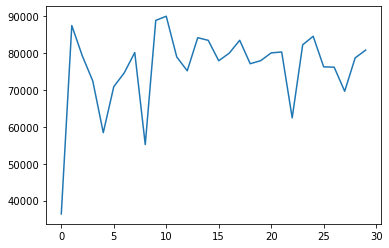

In [54]:
start_day["Start Full"].plot();

In [55]:
start_hour = df.groupby(pd.Grouper(key='Start Full', freq='60min'))[["Start Full"]].count()

In [56]:
start_hour.rename(columns={df.columns[2]: "Trips Started"})

,Trips Started
Start Full,
2021-09-01 00:00:00,1026
2021-09-01 01:00:00,574
2021-09-01 02:00:00,309
2021-09-01 03:00:00,182
2021-09-01 04:00:00,161
...,...
2021-09-30 19:00:00,5394
2021-09-30 20:00:00,3715
2021-09-30 21:00:00,2758


In [57]:
station_start_day = df.groupby(["Start Station", "Start Date"])[['Start Full']].count().reset_index()
station_end_day = df.groupby(["End Station", "End Date",])[['End Full']].count().reset_index()
station_start_day

,Start Station,Start Date,Start Full
0,1 Ave & E 110 St,2021-09-01,47
1,1 Ave & E 110 St,2021-09-02,96
2,1 Ave & E 110 St,2021-09-03,77
3,1 Ave & E 110 St,2021-09-04,90
4,1 Ave & E 110 St,2021-09-05,49
...,...,...,...
28259,Yankee Ferry Terminal,2021-09-26,186
28260,Yankee Ferry Terminal,2021-09-27,13
28261,Yankee Ferry Terminal,2021-09-28,2
28262,Yankee Ferry Terminal,2021-09-29,13


In [58]:
station_start = df.groupby(["Start Station"])[['Start Full']].count().reset_index().sort_values('Start Full', ascending=False)
station_end = df.groupby(["End Station"])[['End Full']].count().reset_index().sort_values('End Full', ascending=False)

In [73]:
station_start.head(10)

,Start Station,Start Full
853,W 21 St & 6 Ave,14020
380,E 17 St & Broadway,13421
848,W 20 St & 10 Ave,12532
215,Broadway & E 14 St,12459
138,9 Ave & W 22 St,12041
122,6 Ave & W 33 St,11843
270,Cleveland Pl & Spring St,11790
950,West St & Chambers St,11409
216,Broadway & E 21 St,11206
251,Carmine St & 6 Ave,11178


In [72]:
station_end.head(10).sum()

End Station    W 21 St & 6 AveE 17 St & BroadwayW 20 St & 10 ...
End Full                                                  122826
dtype: object

In [84]:
station_start_hour = df.groupby(['Start Station', pd.Grouper(key='Start Full', freq='4H')])["Start Counter"].sum().reset_index()
station_end_hour = df.groupby(['End Station', pd.Grouper(key='End Full', freq='4H')])["End Counter"].sum().reset_index()

,Start Station,Start Full,Start Counter
0,1 Ave & E 110 St,2021-09-01 00:00:00,2
1,1 Ave & E 110 St,2021-09-01 04:00:00,1
2,1 Ave & E 110 St,2021-09-01 08:00:00,9
3,1 Ave & E 110 St,2021-09-01 12:00:00,23
4,1 Ave & E 110 St,2021-09-01 16:00:00,12
...,...,...,...
137469,Yankee Ferry Terminal,2021-09-29 12:00:00,9
137470,Yankee Ferry Terminal,2021-09-29 16:00:00,2
137471,Yankee Ferry Terminal,2021-09-30 08:00:00,1
137472,Yankee Ferry Terminal,2021-09-30 12:00:00,1


In [91]:
top_10 = ['W 21 St & 6 Ave', 'E 17 St & Broadway', 'W 20 St & 10 Ave', 'Broadway & E 14 St', '9 Ave & W 22 St',
         '6 Ave & W 33 St', 'Cleveland Pl & Spring St', 'West St & Chambers St', 'Broadway & E 21 St', 'Carmine St & 6 Ave']
start_top_10 = df.loc[df['Start Station'].isin(top_10)]
start_top_10

,ride_id,rideable_type,Start Full,End Full,Start Station,Start ID,End Station,End ID,start_lat,start_lng,...,End Date,End Time,Start Neighborhood,Start Borough,Start Zip Code,End Neighborhood,End Borough,End Zip Code,Start Counter,End Counter
293,C9BCEB55E8CD50AC,classic_bike,2021-09-26 20:10:32,2021-09-26 20:31:45,Carmine St & 6 Ave,5763.03,E 51 St & 1 Ave,6532.06,40.730386,-74.002150,...,2021-09-26,20:31:45,West Village,Manhattan,10014,Midtown East,Manhattan,10022,1,-1
294,FBA0DB24B650E8E4,classic_bike,2021-09-28 15:30:22,2021-09-28 15:57:22,Carmine St & 6 Ave,5763.03,E 51 St & 1 Ave,6532.06,40.730386,-74.002150,...,2021-09-28,15:57:22,West Village,Manhattan,10014,Midtown East,Manhattan,10022,1,-1
295,A0ED66D4E246F76E,classic_bike,2021-09-18 00:05:14,2021-09-18 00:36:00,Carmine St & 6 Ave,5763.03,E 51 St & 1 Ave,6532.06,40.730386,-74.002150,...,2021-09-18,00:36:00,West Village,Manhattan,10014,Midtown East,Manhattan,10022,1,-1
296,B6EC435299AAF6EB,classic_bike,2021-09-26 20:10:30,2021-09-26 20:31:40,Carmine St & 6 Ave,5763.03,E 51 St & 1 Ave,6532.06,40.730386,-74.002150,...,2021-09-26,20:31:40,West Village,Manhattan,10014,Midtown East,Manhattan,10022,1,-1
297,FBD8DA94E13D6A36,classic_bike,2021-09-15 23:26:57,2021-09-15 23:50:32,Carmine St & 6 Ave,5763.03,E 51 St & 1 Ave,6532.06,40.730386,-74.002150,...,2021-09-15,23:50:32,West Village,Manhattan,10014,Midtown East,Manhattan,10022,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263860,9964645FE458B1D1,classic_bike,2021-09-18 14:41:19,2021-09-18 15:27:18,West St & Chambers St,5329.03,Riverside Dr & W 82 St,7388.10,40.717548,-74.013221,...,2021-09-18,15:27:18,Tribeca,Manhattan,10282,Upper West Side,Manhattan,10024,1,-1
3263924,BB1E131583B5C72A,classic_bike,2021-09-26 13:59:10,2021-09-26 14:37:55,West St & Chambers St,5329.03,Riverside Dr & W 104 St,7623.13,40.717548,-74.013221,...,2021-09-26,14:37:55,Tribeca,Manhattan,10282,Upper West Side,Manhattan,10025,1,-1
3263925,DC0438E78B65F629,classic_bike,2021-09-02 17:10:59,2021-09-02 17:48:55,West St & Chambers St,5329.03,Riverside Dr & W 104 St,7623.13,40.717548,-74.013221,...,2021-09-02,17:48:55,Tribeca,Manhattan,10282,Upper West Side,Manhattan,10025,1,-1
3263926,064F415CEEA78281,classic_bike,2021-09-10 13:35:13,2021-09-10 14:22:26,West St & Chambers St,5329.03,Riverside Dr & W 104 St,7623.13,40.717548,-74.013221,...,2021-09-10,14:22:26,Tribeca,Manhattan,10282,Upper West Side,Manhattan,10025,1,-1


In [92]:
start_top_10.to_csv(r'/Users/aseo/Downloads/start_top_10.csv', index = False, header = True)